In [17]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

# from Ipython.display import display

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
data.shape

(1599, 12)

In [4]:
features = data.columns.drop('quality')
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [5]:
# Splitting the train and validation sets
df_train = data.sample(frac=0.7, random_state=0)
df_train.shape

(1119, 12)

In [6]:
df_valid = data.drop(df_train.index)
df_valid.shape

(480, 12)

## Data Transformation
> Scaling [0, 1]

In [7]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

max_

fixed acidity            15.9000
volatile acidity          1.5800
citric acid               0.7900
residual sugar           13.9000
chlorides                 0.6110
free sulfur dioxide      72.0000
total sulfur dioxide    289.0000
density                   1.0032
pH                        3.9000
sulphates                 1.9800
alcohol                  14.9000
quality                   8.0000
dtype: float64

In [8]:
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4


In [9]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)

y_train = df_train.quality
y_valid = df_valid.quality

In [10]:
model = keras.Sequential([
    layers.Dense(248, activation='relu', input_shape=[11]),
    layers.Dense(248, activation='relu'),
    layers.Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # Minimum expected change
    patience = 20, # Epochs to wait before stopping if improvement has not happened 
    restore_best_weights=True # Restore the best weights with the minimum loss
)

In [12]:
model.compile(optimizer='adam', loss='mae')

In [13]:
history = model.fit(X_train, y_train,
                   validation_data = (X_valid, y_valid),
                   batch_size = 256,
                   epochs = 500,
                   callbacks = [early_stopping], # Callbacks in a list
                   verbose = True) # Turn off training log

Train on 1119 samples, validate on 480 samples
Epoch 1/500
1119/1119 [==============================] - 0s 211us/sample - loss: 0.3434 - val_loss: 0.1545
Epoch 2/500
1119/1119 [==============================] - 0s 30us/sample - loss: 0.1784 - val_loss: 0.1573
Epoch 3/500
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1383 - val_loss: 0.1480
Epoch 4/500
1119/1119 [==============================] - 0s 33us/sample - loss: 0.1411 - val_loss: 0.1360
Epoch 5/500
1119/1119 [==============================] - 0s 31us/sample - loss: 0.1229 - val_loss: 0.1214
Epoch 6/500
1119/1119 [==============================] - 0s 29us/sample - loss: 0.1200 - val_loss: 0.1134
Epoch 7/500
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1123 - val_loss: 0.1137
Epoch 8/500
1119/1119 [==============================] - 0s 31us/sample - loss: 0.1107 - val_loss: 0.1065
Epoch 9/500
1119/1119 [==============================] - 0s 32us/sample - loss: 0.1082 - val_loss: 0.107

1119/1119 [==============================] - 0s 34us/sample - loss: 0.0851 - val_loss: 0.0947
Epoch 78/500
1119/1119 [==============================] - 0s 70us/sample - loss: 0.0844 - val_loss: 0.0997


In [14]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,val_loss
0,0.343432,0.154521
1,0.178365,0.157260
2,0.138295,0.148033
3,0.141065,0.136002
4,0.122899,0.121447


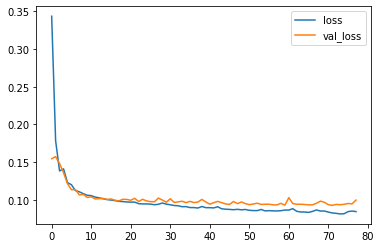

In [15]:
history_df.loc[:, ['loss', 'val_loss']].plot()

In [16]:
print(f"Minimum Validaton Loss : {history_df.val_loss.min()}")

Minimum Validaton Loss : 0.0927398274342219
